In [1]:
import zipfile as zf
files = zf.ZipFile("BCICIV_2b_gdf.zip", 'r')
files.extractall('Path finfing in neurogaming')
files.close()

In [9]:
pip install gdflib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gdflib: filename=gdflib-0.0.1-py3-none-any.whl size=4782 sha256=6c567d7f5d4c829ee03e4b41103d8b6afe102fefc38693329459a10b387ee032
  Stored in directory: c:\users\21694\appdata\local\pip\cache\wheels\56\bf\8a\d729fbd9f555c7e44e7eb6f00e1d81a5dd55d3e6eda8bc0a3e
Successfully built gdflib
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
import mne

# Replace 'your_file.gdf' with the path to your .gdf file
file_path = 'Path finding in neurogaming/BCICIV_2b_gdf/B0905E.gdf'

# Read the .gdf file using mne
raw_data = mne.io.read_raw_gdf(file_path, preload=True)

# Get the EEG data (EEG channels only)
eeg_data = raw_data.get_data()

# Get the channel names (labels)
channel_names = raw_data.ch_names

# Get the sampling frequency (sampling rate)
sampling_frequency = raw_data.info['sfreq']


Extracting EDF parameters from C:\Users\21694\Path finding in neurogaming\Path finding in neurogaming\BCICIV_2b_gdf\B0905E.gdf...
GDF file detected


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\21694\\Path finding in neurogaming\\Path finding in neurogaming\\BCICIV_2b_gdf\\B0905E.gdf'

In [1]:
import pandas as pd
import numpy as np
import mne

# Load the provided CSV dataset
data = pd.read_csv('BCICIV_2a_2.csv')

# Separate data based on classes
left_data = data[data['label'] == 'left']
right_data = data[data['label'] == 'right']

# Get electrode names (excluding 'patient', 'time', 'label', and 'epoch' columns)
electrode_names = data.columns[4:]

# Create info objects for both left and right classes (assuming the same electrodes for each class)
info_left = mne.create_info(ch_names=list(electrode_names), sfreq=1.0, ch_types='eeg')
info_right = mne.create_info(ch_names=list(electrode_names), sfreq=1.0, ch_types='eeg')

# Create epochs for each class
epochs_left = []
for _, left_row in left_data.iterrows():
    left_signal = np.array(left_row[electrode_names])
    left_event = mne.make_fixed_length_events(np.expand_dims(left_signal, axis=1), id=1)
    left_epoch = mne.EpochsArray([left_signal], info=info_left, events=left_event, event_id=1, tmin=0)
    epochs_left.append(left_epoch)

epochs_right = []
for _, right_row in right_data.iterrows():
    right_signal = np.array(right_row[electrode_names])
    right_event = mne.make_fixed_length_events(np.expand_dims(right_signal, axis=1), id=1)
    right_epoch = mne.EpochsArray([right_signal], info=info_right, events=right_event, event_id=1, tmin=0)
    epochs_right.append(right_epoch)

# Concatenate the epochs for both classes
epochs_left = mne.concatenate_epochs(epochs_left)
epochs_right = mne.concatenate_epochs(epochs_right)

# Save the new dataset into a new format (for further analysis if needed)
epochs_left.save('left_motor_imagery-epo.fif', overwrite=True)
epochs_right.save('right_motor_imagery-epo.fif', overwrite=True)


TypeError: raw must be an instance of BaseRaw, got <class 'numpy.ndarray'> instead.

In [ ]:
import mne
import numpy as np

# Assuming left_signal is your EEG/MEG data in a NumPy array with shape (n_channels, n_samples)
sampling_rate = 250  # Sampling rate in Hz

# Create info about the channels in your data
n_channels = left_signal.shape[0]  # Replace this with the actual number of channels in your data
ch_names = ['ch{}'.format(i) for i in range(n_channels)]
ch_types = ['eeg' for _ in range(n_channels)]  # Adjust the channel type if needed

info = mne.create_info(ch_names=ch_names, sfreq=sampling_rate, ch_types=ch_types)

# Create a raw instance using your data and the info
raw_left = mne.io.RawArray(left_signal, info)

# Now, you can use mne.make_fixed_length_events with your raw_left instance
duration = 1.0  # Duration of each event in seconds
left_event = mne.make_fixed_length_events(raw_left, id=1, duration=duration)


In [6]:
import pandas as pd
import mne

# Load the CSV dataset
data = pd.read_csv('BCICIV_2a_2.csv')
# Convert the columns into a list
ch_names = data.columns[4:].tolist()
# Convert the pandas DataFrame to an MNE Raw object
# Note: 'info' contains information about the data, such as sampling rate and channel names
info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types='eeg')
raw = mne.io.RawArray(data.iloc[:, 4:].values.T, info)

# Define the electrode locations (you may need to replace these with the actual coordinates of your electrodes)
montage = mne.channels.make_standard_montage('standard_1005')

# Set the montage for the Raw object
raw.set_montage(montage)

# Create an event array for each class (left, right)
events_left = mne.make_fixed_length_events(raw, duration=1.0, overlap=0.0, id=1)
events_right = mne.make_fixed_length_events(raw, duration=1.0, overlap=0.0, id=2)

# Create epochs for each class
epochs_left = mne.Epochs(raw, events_left, tmin=0, tmax=1, baseline=None)
epochs_right = mne.Epochs(raw, events_right, tmin=0, tmax=1, baseline=None)

# Get the electrode locations for each class
electrode_locations_left = epochs_left.info['chs'][0:22]  # Assuming you have 21 electrodes
electrode_locations_right = epochs_right.info['chs'][0:22]  # Assuming you have 21 electrodes

# Print electrode locations for left class
print('Electrode locations for left class:')
for electrode in electrode_locations_left:
    print(electrode['ch_name'], ':', electrode['loc'])

# Print electrode locations for right class
print('Electrode locations for right class:')
for electrode in electrode_locations_right:
    print(electrode['ch_name'], ':', electrode['loc'])


Creating RawArray with float64 data, n_channels=22, n_times=57888
    Range : 0 ... 57887 =      0.000 ...   231.548 secs
Ready.


ValueError: DigMontage is only a subset of info. There are 22 channel positions not present in the DigMontage. The channels missing from the montage are:

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [7]:
import mne
import pandas as pd
import numpy as np

# Load the CSV dataset into a pandas DataFrame
data_df = pd.read_csv('BCICIV_2a_2.csv')

# Get the unique class labels
unique_classes = data_df['label'].unique()

# Create a dictionary to store electrode placements for each class
electrode_placements = {label: [] for label in unique_classes}

# Loop through the DataFrame and store electrode placements for each class
for label in unique_classes:
    class_df = data_df[data_df['label'] == label]
    electrode_positions = class_df[['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4',
                                    'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4',
                                    'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13',
                                    'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']].values
    electrode_placements[label] = electrode_positions

# Convert the electrode placements dictionary into a MNE Info object
info = mne.create_info(ch_names=[f'EEG-{i}' for i in range(22)],
                       ch_types=['eeg'] * 22,
                       sfreq=250)

# Create MNE EpochsArray for each class
epochs_per_class = {}
for label, electrode_positions in electrode_placements.items():
    data = np.expand_dims(electrode_positions, axis=0)
    epochs_array = mne.EpochsArray(data, info)
    epochs_per_class[label] = epochs_array

# Save the MNE EpochsArray for each class into a new dataset
for label, epochs_array in epochs_per_class.items():
    output_filename = f'{label}_epochs.fif'
    epochs_array.save(output_filename, overwrite=True)


ValueError: Info and data must have same number of channels.

In [8]:
import pandas as pd

# Load the dataset from the provided CSV file
dataset_path = 'BCICIV_2a_2.csv'
data = pd.read_csv(dataset_path)

# Get the actual number of EEG channels and time points
eeg_channels = data.columns[5:]  # Assuming EEG channels start from column index 5
num_eeg_channels = len(eeg_channels)
num_time_points = len(data)

print("Actual number of EEG channels:", num_eeg_channels)
print("Actual number of time points:", num_time_points)


Actual number of EEG channels: 21
Actual number of time points: 57888


In [9]:
import mne

# Create empty dictionaries to store electrode placements for each class
left_electrodes = {}
right_electrodes = {}

# Define the montage for the 10-20 system
montage = mne.channels.make_standard_montage('standard_1020')

# Loop through the dataset to extract electrode locations for each class
for index, row in data.iterrows():
    label = row['label']
    epoch = row['epoch']
    epoch_data = row[eeg_channels].values.reshape(1, num_eeg_channels) * 1e-6  # Convert microvolts to volts

    # Create an info object for the epoch data
    info = mne.create_info(ch_names=eeg_channels.tolist(), sfreq=250, ch_types='eeg')
    raw = mne.io.RawArray(epoch_data, info)

    # Set the montage for the epoch data
    raw.set_montage(montage)

    # Get the coordinates of the electrodes for each class
    if label == 'left':
        left_electrodes[epoch] = raw.get_channel_positions()
    elif label == 'right':
        right_electrodes[epoch] = raw.get_channel_positions()

# Print the electrode placements for each class
print("Electrode placements for imagining the left class:")
for epoch, electrodes in left_electrodes.items():
    print(f"Epoch {epoch}: {electrodes}")

print("\nElectrode placements for imagining the right class:")
for epoch, electrodes in right_electrodes.items():
    print(f"Epoch {epoch}: {electrodes}")


ValueError: len(data) (1) does not match len(info["ch_names"]) (21)

In [10]:
import pandas as pd
import numpy as np
import mne

# Load the dataset from the provided CSV file
dataset_path = 'BCICIV_2a_2.csv'
data = pd.read_csv(dataset_path)

# Get the actual number of EEG channels and time points
eeg_channels = data.columns[5:]  # Assuming EEG channels start from column index 5
num_eeg_channels = len(eeg_channels)
num_time_points = len(data)

print("Actual number of EEG channels:", num_eeg_channels)
print("Actual number of time points:", num_time_points)

# Create empty dictionaries to store electrode placements for each class
left_electrodes = {}
right_electrodes = {}

# Define the montage for the 10-20 system
montage = mne.channels.make_standard_montage('standard_1020', head_size=1.0)

# Create an info object for the dataset
info = mne.create_info(ch_names=eeg_channels.tolist(), sfreq=250, ch_types='eeg')
raw = mne.io.RawArray(np.zeros((num_eeg_channels, num_time_points)), info)

# Set the montage for the info object
raw.set_montage(montage)

# Loop through the dataset to extract electrode locations for each class
for index, row in data.iterrows():
    label = row['label']
    epoch = row['epoch']
    epoch_data = row[eeg_channels].values.reshape(num_eeg_channels, 1) * 1e-6  # Convert microvolts to volts

    # Update the data for the info object
    raw._data = epoch_data

    # Get the coordinates of the electrodes for each class
    if label == 'left':
        left_electrodes[epoch] = raw.get_channel_positions()
    elif label == 'right':
        right_electrodes[epoch] = raw.get_channel_positions()

# Print the electrode placements for each class
print("Electrode placements for imagining the left class:")
for epoch, electrodes in left_electrodes.items():
    print(f"Epoch {epoch}: {electrodes}")

print("\nElectrode placements for imagining the right class:")
for epoch, electrodes in right_electrodes.items():
    print(f"Epoch {epoch}: {electrodes}")


Actual number of EEG channels: 21
Actual number of time points: 57888
Creating RawArray with float64 data, n_channels=21, n_times=57888
    Range : 0 ... 57887 =      0.000 ...   231.548 secs
Ready.


ValueError: DigMontage is only a subset of info. There are 21 channel positions not present in the DigMontage. The channels missing from the montage are:

['EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [14]:
import pandas as pd
import numpy as np
import mne

# Load the dataset from the provided CSV file
dataset_path = 'BCICIV_2a_2.csv'
data = pd.read_csv(dataset_path)

# Get the actual number of EEG channels and time points
eeg_channels = ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4',
                                    'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4',
                                    'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13',
                                    'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']
num_eeg_channels = len(eeg_channels)
num_time_points = len(data)

print("Actual number of EEG channels:", num_eeg_channels)
print("Actual number of time points:", num_time_points)

# Create a mapping dictionary to rename channels to the standard 10-20 system names
mapping = {
    'EEG-0': 'EEG-Fp1',
    'EEG-1': 'EEG-Fp2',
    'EEG-2': 'EEG-F3',
    'EEG-3': 'EEG-F4',
    'EEG-C3': 'EEG-C3',
    'EEG-C4': 'EEG-C4',
    'EEG-4': 'EEG-P3',
    'EEG-5': 'EEG-P4',
    'EEG-6': 'EEG-O1',
    'EEG-7': 'EEG-O2',
    'EEG-8': 'EEG-F7',
    'EEG-9': 'EEG-F8',
    'EEG-10': 'EEG-T3',
    'EEG-11': 'EEG-T4',
    'EEG-12': 'EEG-T5',
    'EEG-13': 'EEG-T6',
    'EEG-Fz': 'EEG-Fz',
    'EEG-Cz': 'EEG-Cz',
    'EEG-Pz': 'EEG-Pz',
    'EEG-14': 'EEG-A1',
    'EEG-15': 'EEG-A2',
}


# Apply the channel renaming to the data
data.rename(columns=mapping, inplace=True)

# Create an info object for the dataset using the standard 10-20 system montage
montage = mne.channels.make_standard_montage('standard_1020', head_size=1.0)
info = mne.create_info(ch_names=eeg_channels, sfreq=250, ch_types='eeg')

# Create an empty raw object to store the data and use for electrode placement
raw = mne.io.RawArray(np.zeros((num_eeg_channels, num_time_points)), info)

# Create dictionaries to store electrode placements for each class
left_electrodes = {}
right_electrodes = {}

# Loop through the dataset to extract electrode locations for each class
for index, row in data.iterrows():
    label = row['label']
    epoch = row['epoch']
    epoch_data = row[eeg_channels].values.reshape(num_eeg_channels, 1) * 1e-6  # Convert microvolts to volts

    # Update the data for the raw object
    raw._data = epoch_data

    # Get the coordinates of the electrodes for each class
    if label == 'left':
        left_electrodes[epoch] = raw.get_channel_positions()
    elif label == 'right':
        right_electrodes[epoch] = raw.get_channel_positions()

# Print the electrode placements for each class
print("Electrode placements for imagining the left class:")
for epoch, electrodes in left_electrodes.items():
    print(f"Epoch {epoch}: {electrodes}")

print("\nElectrode placements for imagining the right class:")
for epoch, electrodes in right_electrodes.items():
    print(f"Epoch {epoch}: {electrodes}")


Actual number of EEG channels: 22
Actual number of time points: 57888
Creating RawArray with float64 data, n_channels=22, n_times=57888
    Range : 0 ... 57887 =      0.000 ...   231.548 secs
Ready.


KeyError: "['EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-6', 'EEG-7', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-15'] not in index"

In [15]:
import pandas as pd
import numpy as np
import mne
from mne.channels.montage import Montage

# Read the provided CSV file
df = pd.read_csv('BCICIV_2a_2.csv')

# Define the electrode names
electrode_names = df.columns[4:].tolist()

# Filter the dataset to keep only the left and right classes
left_data = df[df['label'] == 'left'][electrode_names].values.T
right_data = df[df['label'] == 'right'][electrode_names].values.T

# Define the sampling rate
sfreq = 250  # Hz

# Create MNE Info objects
info_left = mne.create_info(ch_names=electrode_names, sfreq=sfreq, ch_types='eeg')
info_right = mne.create_info(ch_names=electrode_names, sfreq=sfreq, ch_types='eeg')

# Create MNE RawArray objects
raw_left = mne.io.RawArray(left_data, info_left)
raw_right = mne.io.RawArray(right_data, info_right)

# Load the 10-20 international montage
montage = read_montage('standard_1020')

# Set the montage to the RawArray objects
raw_left.set_montage(montage)
raw_right.set_montage(montage)

# Plot the electrode locations for left class
raw_left.plot_sensors(show_names=True)

# Plot the electrode locations for right class
raw_right.plot_sensors(show_names=True)


ImportError: cannot import name 'read_montage' from 'mne.channels' (C:\Users\21694\anaconda3\lib\site-packages\mne\channels\__init__.py)

In [18]:
mne.__version__

'1.4.2'

In [17]:
pip install --upgrade mne

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [19]:
import pandas as pd
import mne
import numpy as np

# Load the provided motor imagery dataset from the CSV file
data = pd.read_csv("BCICIV_2a_2.csv")

# Define the channel names
channels = data.columns[4:].tolist()

# Create an MNE info object with the channel names and sampling rate
info = mne.create_info(channels, sfreq=250, ch_types="eeg")

# Initialize an empty array to store the EEG data
eeg_data = np.zeros((len(data), len(channels)))

# Fill the EEG data array with the values from the CSV file
for i, channel in enumerate(channels):
    eeg_data[:, i] = data[channel]

# Create an MNE Raw object with the EEG data and info
raw = mne.io.RawArray(eeg_data.T, info)

# Define the electrode positions for the Biosemi32 montage
montage = mne.channels.make_standard_montage("biosemi32")

# Apply the montage to the Raw object
raw.set_montage(montage)

# Pick channels corresponding to C3 and C4 (left and right motor cortex)
left_channels = ["EEG-C3"]
right_channels = ["EEG-C4"]

# Extract epochs for left and right motor imagery
left_events = data[data["label"] == "left"]["epoch"].values
right_events = data[data["label"] == "right"]["epoch"].values

left_epochs = mne.Epochs(raw, left_events, tmin=-0.5, tmax=4, baseline=None, picks=left_channels, event_id=None)
right_epochs = mne.Epochs(raw, right_events, tmin=-0.5, tmax=4, baseline=None, picks=right_channels, event_id=None)

# Save the left and right motor imagery epochs to new datasets
left_epochs.save("left_motor_imagery-epo.fif")
right_epochs.save("right_motor_imagery-epo.fif")


Creating RawArray with float64 data, n_channels=22, n_times=57888
    Range : 0 ... 57887 =      0.000 ...   231.548 secs
Ready.


ValueError: DigMontage is only a subset of info. There are 22 channel positions not present in the DigMontage. The channels missing from the montage are:

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

In [3]:
import pandas as pd
import mne
import os

# Step 1: Import necessary libraries

# Step 2: Read the provided CSV file
data = pd.read_csv('BCICIV_2a_2.csv')

# Step 3: Organize data for each class separately
classes = ['right', 'left', 'tongue', 'foot']
montage = mne.channels.make_standard_montage('biosemi64')
sampling_rate = 250  # 250Hz

for class_name in classes:
    # Select data for the current class
    class_data = data[data['label'] == class_name]

    # Extract electrode names from the CSV columns (excluding 'patient', 'time', 'label', 'epoch')
    electrode_names = data.columns[4:]

    # Get electrode positions from the montage
    electrode_positions = montage.get_positions()

    # Create an info object for MNE
    info = mne.create_info(ch_names=list(electrode_names), sfreq=sampling_rate, ch_types='eeg')
    info.set_montage(montage)

    # Create an empty data array
    data_array = class_data[electrode_names].values.T

    # Create a Raw object from the data array and info
    raw = mne.io.RawArray(data_array, info)

    # Step 5: Save the raw objects to separate folders
    folder_name = f'{class_name}_data'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Save the raw object
    raw.save(os.path.join(folder_name, f'{class_name}_data_raw.fif'), overwrite=True)

print("Data processing and saving completed successfully.")


ValueError: DigMontage is only a subset of info. There are 22 channel positions not present in the DigMontage. The channels missing from the montage are:

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

Creating RawArray with float64 data, n_channels=22, n_times=57888
    Range : 0 ... 57887 =      0.000 ...   231.548 secs
Ready.


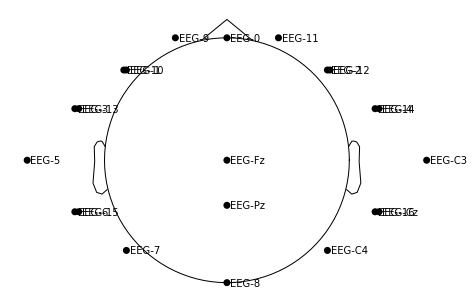

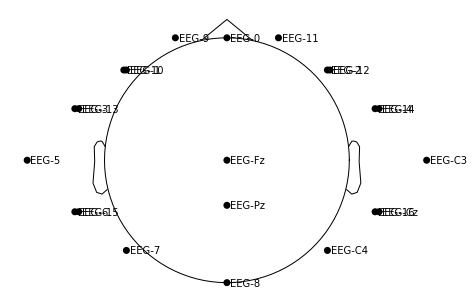

In [6]:
import pandas as pd
import mne
import os
# Step 2: Read the provided CSV file
df = pd.read_csv('BCICIV_2a_2.csv')

# Step 3: Organize data for each class separately
classes = ['right', 'left', 'tongue', 'foot']
# Electrode positions for the Biosemi 32-channel EEG system
electrode_positions = {
    'EEG-Fz': [0.0, 0.0, 0.0],
    'EEG-0': [0.0, 0.095, 0.0],
    'EEG-1': [-0.078, 0.070, 0.0],
    'EEG-2': [0.078, 0.070, 0.0],
    'EEG-3': [-0.118, 0.040, 0.0],
    'EEG-4': [0.118, 0.040, 0.0],
    'EEG-5': [-0.155, 0.0, 0.0],
    'EEG-C3': [0.155, 0.0, 0.0],
    'EEG-6': [-0.118, -0.040, 0.0],
    'EEG-Cz': [0.118, -0.040, 0.0],
    'EEG-7': [-0.078, -0.070, 0.0],
    'EEG-C4': [0.078, -0.070, 0.0],
    'EEG-8': [0.0, -0.095, 0.0],
    'EEG-9': [-0.040, 0.095, 0.0],
    'EEG-10': [-0.080, 0.070, 0.0],
    'EEG-11': [0.040, 0.095, 0.0],
    'EEG-12': [0.080, 0.070, 0.0],
    'EEG-13': [-0.115, 0.040, 0.0],
    'EEG-14': [0.115, 0.040, 0.0],
    'EEG-Pz': [0.0, -0.035, 0.0],
    'EEG-15': [-0.115, -0.040, 0.0],
    'EEG-16': [0.115, -0.040, 0.0],
}

# Create the montage
biosemi_montage = mne.channels.make_dig_montage(ch_pos=electrode_positions, coord_frame='head')
ch_names = df.columns[4:].tolist()

# Load the data into an MNE RawArray object (assuming your data is in a pandas DataFrame named 'df')
# 'info' contains information about the data and channels (e.g., sampling rate, channel names)
info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types='eeg')
raw_data = mne.io.RawArray(data=df[df.columns[4:]].values.T, info=info)

# Set the montage to the RawArray object
raw_data.set_montage(biosemi_montage)

# Plot the electrode positions to verify the montage
raw_data.plot_sensors(show_names=True)


In [22]:
montage = mne.channels.make_standard_montage('biosemi32')

In [23]:
data = pd.read_csv("BCICIV_2a_2.csv")

In [24]:
montage = mne.channels.make_standard_montage('biosemi32')

In [25]:
unique_classes = data['label'].unique()

In [27]:
for class_label in unique_classes:
    class_data = data[data['label'] == class_label]
    class_folder = f"{class_label}_data"
    
    # Create a folder for the class if it doesn't exist
    import os
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
    
    for idx, row in class_data.iterrows():
        electrode_names = data.columns[4:]  # Extract electrode names from the columns
        electrode_values = row[4:].values   # Extract electrode values from the row
        
ch_names_list = data['ch_names'].tolist()

# Now you can use this list in the mne.create_info() function along with other required parameters.
info = mne.create_info(ch_names=ch_names_list, sfreq=250, ch_types='eeg')
        # Create a raw MNE object with the EEG data and Biosemi32 montage
        raw = mne.io.RawArray([electrode_values], info=mne.create_info(electrode_names, sfreq=250, ch_types='eeg'),
                              verbose=False)
        raw.set_montage(montage)

        # Save the raw data in the class folder with a suitable filename
        filename = f"{class_label}_{row['patient']}_{row['time']}.fif"
        filepath = os.path.join(class_folder, filename)
        raw.save(filepath, overwrite=True)


IndentationError: unexpected indent (<ipython-input-27-d0e614f7779c>, line 19)

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load the dataset
data = pd.read_csv('BCICIV_2a_2.csv')

# Preprocess the EEG data
X = data[['EEG-Fz', 'EEG-C3', 'EEG-C4', 'EEG-Pz']].values
y = data['label'].map({'left': 0, 'right': 1}).values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for 1D Convolution
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and compile the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/20
1158/1158 [==============================] - 7s 2ms/step - loss: nan - accuracy: 0.2518 - val_loss: nan - val_accuracy: 0.2545
Epoch 2/20
1158/1158 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.2518 - val_loss: nan - val_accuracy: 0.2545
Epoch 3/20
1158/1158 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.2518 - val_loss: nan - val_accuracy: 0.2545
Epoch 4/20
1158/1158 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.2518 - val_loss: nan - val_accuracy: 0.2545
Epoch 5/20
1158/1158 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.2518 - val_loss: nan - val_accuracy: 0.2545
Epoch 6/20
1158/1158 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.2518 - val_loss: nan - val_accuracy: 0.2545
Epoch 7/20
1158/1158 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.2518 - val_loss: nan - val_accuracy: 0.2545
Epoch 8/20
1158/1158 [============

In [2]:
import os
import pandas as pd
import numpy as np
import mne
from mne.channels import make_standard_montage

# Load the CSV dataset
#data_path = r'C:\Users\21694\Path finding in neurogaming\BCICIV_2a_2.csv'
data_path = os.path.join('C:', 'Users','21694','Path finding in neurogaming')

df = pd.read_csv(os.path.join(data_path, 'BCICIV_2a_2.csv'))

# Create a BioSemi 32-channel standard montage
montage = make_standard_montage('biosemi32')

# Create a folder for each class
classes = df['label'].unique()
for cls in classes:
    cls_folder = os.path.join(data_path, cls)
    os.makedirs(cls_folder, exist_ok=True)

# Iterate through each sample and create new datasets with electrode locations
for idx, row in df.iterrows():
    patient = row['patient']
    cls = row['label']
    raw_data = row.drop(['patient', 'time', 'label', 'epoch'])
    raw_data = np.array(raw_data).reshape(1, -1)

    # Create an Info object with channel names and montage
    ch_names = montage.ch_names
    info = mne.create_info(ch_names, sfreq=250, ch_types='eeg')
    info.set_montage(montage)

    # Create a Raw object
    raw = mne.io.RawArray(raw_data, info)

    # Save the Raw object to the corresponding class folder
    raw.save(os.path.join(data_path, cls, f'patient_{patient}.fif'))


FileNotFoundError: [Errno 2] No such file or directory: 'C:Users\\21694\\Path finding in neurogaming\\BCICIV_2a_2.csv'

In [7]:
import os
print(os.getcwd())

C:\Users\21694\Path finding in neurogaming


['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'O9', 'Iz', 'O10', 'T3', 'T5', 'T4', 'T6', 'M1', 'M2', 'A1', 'A2']
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


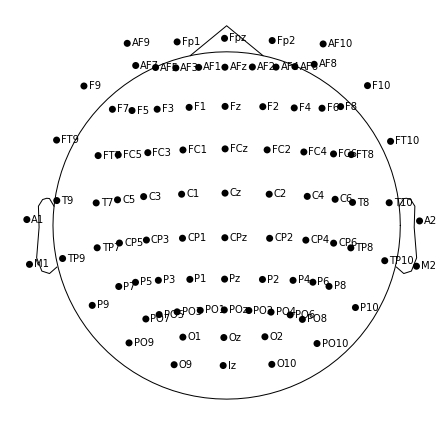

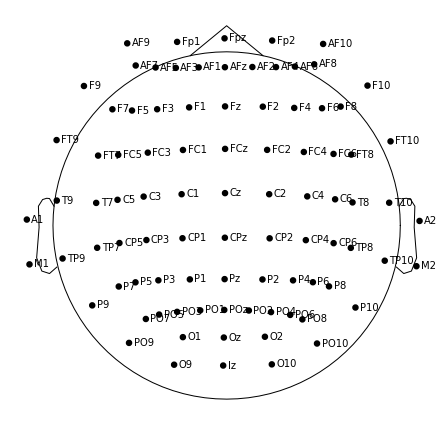

In [8]:
import mne

# Download the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Print the electrode positions
print(montage.ch_names)
# Plot the electrode positions
montage.plot()